Color Quantization - KMeans

In [1]:
# Project Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

import cv2

In [2]:
# Set the number of colors we want
# It also works as 64 clusters where similar colors will be grouped together
n_colors = 64

In [3]:
# Load the image
sample_image = cv2.imread(r"C:\aiprojects\computer-vision\sample_images\colorful_robot.png")

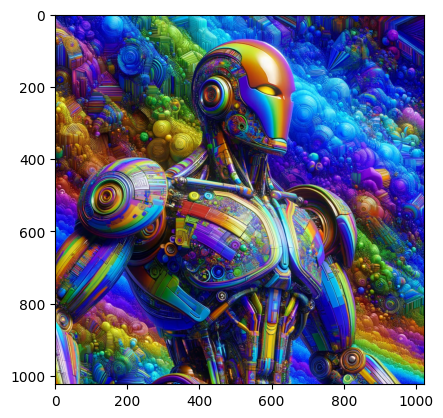

In [4]:
plt.imshow(sample_image)

In [5]:
# Converting the image into an array and dividing values by 255 to get ...
# ... the numbers between 0 and 1

sample_image = np.array(sample_image, dtype=np.float64) / 255

In [6]:
unique_colors = set(tuple(v) for m2d in sample_image for v in m2d)
num_unique_colors = len(unique_colors)
print("Number of unique colors:", num_unique_colors)

Number of unique colors: 819777


In [7]:
# Load Image and transform to a 2D numpy array.
# This step is required for clustering algorithm.
w, h, d = original_shape = tuple(sample_image.shape)
assert d == 3
image_array = np.reshape(sample_image, (w * h, d))

In [8]:
# Fitting model on a small sub-sample of the data

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
)

In [9]:
# Get labels for all points
# Predicting color indices on the full image (k-means)

labels = kmeans.predict(image_array)


In [10]:
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
# Predicting color indices on the full image (random)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

In [11]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

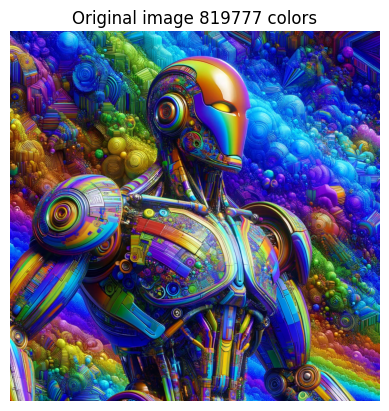

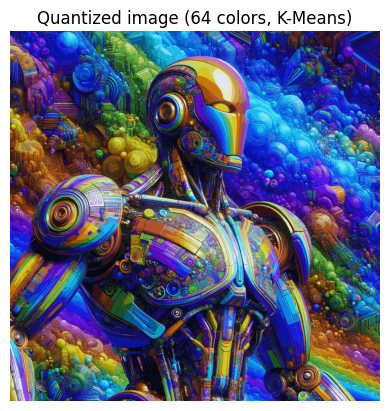

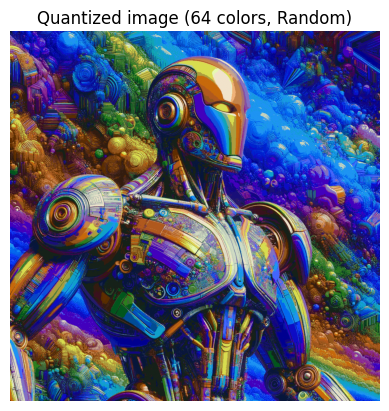

In [12]:
# Display the results
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Original image {num_unique_colors} colors")
plt.imshow(sample_image)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()